# Research on Computer Game Sales
This project utilizes historical data on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation). The objective is to identify the key determinants of a game's success to formulate a sales strategy for a hypothetical online computer game store.

## General data overview

In [1]:

#Open data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


data = pd.read_csv('/datasets/games.csv')





In [2]:

display(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#Data size
print(data.shape)

(16715, 11)


In [4]:
#Data type
print(data.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


### Summary of data overview
- The dataset contains missing values for ratings and user and critic reviews, which will require resolution in the subsequent steps.
- Data types include both numerical and categorical.
- There are significant disparities in release years, encompassing both recent and relatively old releases

## Initial data exploration

In [5]:
#Numerical and non numerical colums 

data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print("Numerical columns:", numeric_cols)


data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print("Non-numerical columns:", non_numeric_cols)

Numerical columns: ['Year_of_Release' 'NA_sales' 'EU_sales' 'JP_sales' 'Other_sales'
 'Critic_Score']
Non-numerical columns: ['Name' 'Platform' 'Genre' 'User_Score' 'Rating']


 user_score is labeled as non numerical, so the type of this variable should be changed

In [6]:
#  Converting column names to lowercase
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#Change of the type and working with missing data

data['user_score'].replace('tbd', np.NaN, inplace=True)


data['user_score'] = data['user_score'].astype('float')


I have replaced the 'tbd' values in the 'user_score' column with missing values. These entries represent cases where there weren't enough reviews to determine a user score.

Regarding the other columns, I have opted not to modify their data types, as numerical columns containing user scores may include non-integer values, and object-type columns contain textual data. The only potential concern pertains to the 'critic_score' and 'year_of_release' columns, as it seems they should be of integer type. Therefore, I have conducted additional checks on these columns.

In [8]:
#Checking of the  сritic_score
data['critic_score'].value_counts()


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [9]:
#Checking of the  year_of_release
data['year_of_release'].value_counts()


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [10]:
#Duplicate checking
data['name'].duplicated().sum()


5155

In [11]:
#Unique values
print(data['name'].value_counts())
display(data.query('name== "Need for Speed: Most Wanted"'))
display(data.query('name== "Ratatouille"'))



Need for Speed: Most Wanted                12
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
                                           ..
BeatMania IIDX 13: DistorteD                1
Rogue Galaxy                                1
Fox Sports College Hoops '99                1
Arc the Lad II                              1
Destroy All Humans! Big Willy Unleashed     1
Name: name, Length: 11559, dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8.0,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,NaN,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,NaN,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


In [12]:

print(data.dtypes)

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [13]:

display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Missing data

In [14]:
#Checking of missings
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))  

name - 0%
platform - 0%
year_of_release - 2%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 40%


In [15]:
# year_of_release
data[data['year_of_release'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
#Delete missings as its share is not so high
data.dropna(subset=['year_of_release'], inplace=True)
data = data.reset_index(drop=True)


In [17]:
#Type changing
data['year_of_release']=data['year_of_release'].astype('int')


In [18]:
#critic_score
data['critic_score'].describe()


count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [19]:
#The share of missings is too high
data[(data['critic_score'].isnull())].head(30)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


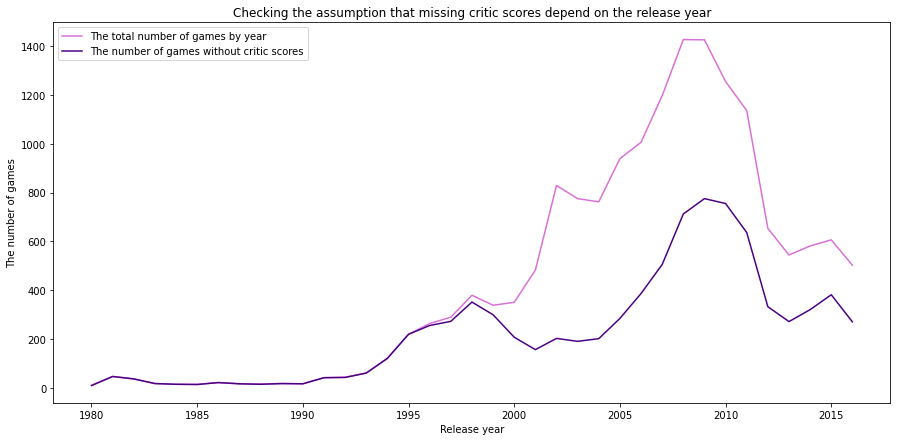

In [20]:
# Missing critic scores may be present for earlier years when the gaming industry was not as developed. 
#To investigate this, let's compare the number of games by year and the number of missing critic scores by year.
(
    data.groupby("year_of_release")["name"]
    .count()
    .plot(
        figsize=(15, 7),
        color="orchid",
        label="The total number of games by year",
        legend=True,
    )
)

(
    data.query("critic_score.isnull()")
    .groupby("year_of_release")["name"]
    .count()
    .plot(
        figsize=(15, 7),
        color="indigo",
        label="The number of games without critic scores",
        legend=True,
        title="Checking the assumption that missing critic scores depend on the release year",
    )
)


plt.xlabel("Release year")
plt.ylabel("The number of games")
plt.show()


<AxesSubplot:xlabel='Release year', ylabel='The number of games'>

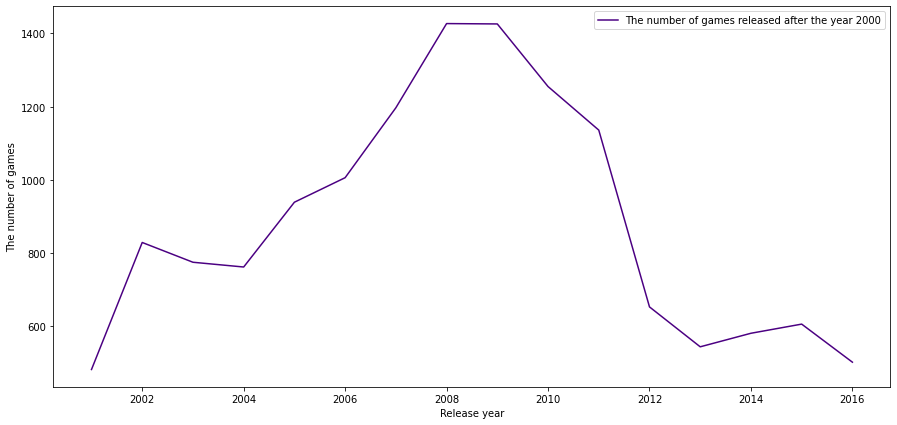

In [21]:
(
    data.query("year_of_release>2000")
    .groupby("year_of_release")["name"]
    .count()
    .plot(
        color="indigo",
        figsize=(15, 7),
        legend=True,
        label="The number of games released after the year 2000",
        xlabel="Release year",
        ylabel="The number of games",
    )
)



According to the chart, there are no games with critic ratings in the early years. This implies that the missing values are related to the release year of the game, and their proportion decreases from 2000 onwards. Since our upcoming task involves determining the relevant period for forecasting, and this period will certainly not include data from the 2000s and beyond, I have decided to leave the missing values as they are.

Furthermore, when examining the number of games released after the 2000s, there is a noticeable sharp increase from 2000 to 2008, followed by a decline. This pattern could be attributed to changes in the gaming industry related to the 2008 financial crisis.

In [22]:
#user_score

data['user_score'].describe()
# No significant outliers

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

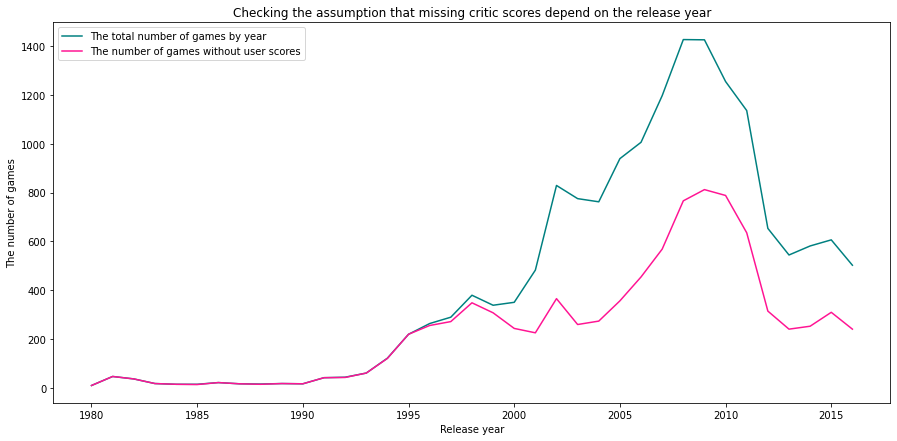

In [23]:
#This column contains 55% missing values. 
#Let's also compare the number of games with the number of missing values for user scores. 

(
    data
    .groupby('year_of_release')
    ['name']
    .count()
    .plot(color='teal', label='The total number of games by year', legend=True, figsize=(15,7))
)


(
    data.query("user_score.isnull()")
    .groupby("year_of_release")["name"]
    .count()
    .plot(
        figsize=(15, 7),
        color="deeppink",
        label="The number of games without user scores",
        legend=True,
        title="Checking the assumption that missing critic scores depend on the release year"),
    )



plt.xlabel('Release year')
plt.ylabel('The number of games')
plt.show()

For user scores, we've identified a similar pattern: user scores started appearing more actively after the year 2000. This further confirms that we should consider data for forecasting purposes only from the year 2000 onwards.

In [24]:

data['rating'].value_counts()


E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [25]:
# K-A rating is an outdated version of the E rating, used until 1998. Therefore, we will replace K-A values with E.

data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

data['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [26]:
# RP (Rating Pending) is assigned to games that have not yet been released. Let's take a look at these games to gather more information.
display(data.query("rating=='RP'"))
#This game was released in 2011. However, this category is only used in promotional presentations and demo versions before the official release. Let's go ahead and remove this row.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14047,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


In [27]:
data = data.query("rating!='RP'")
data['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

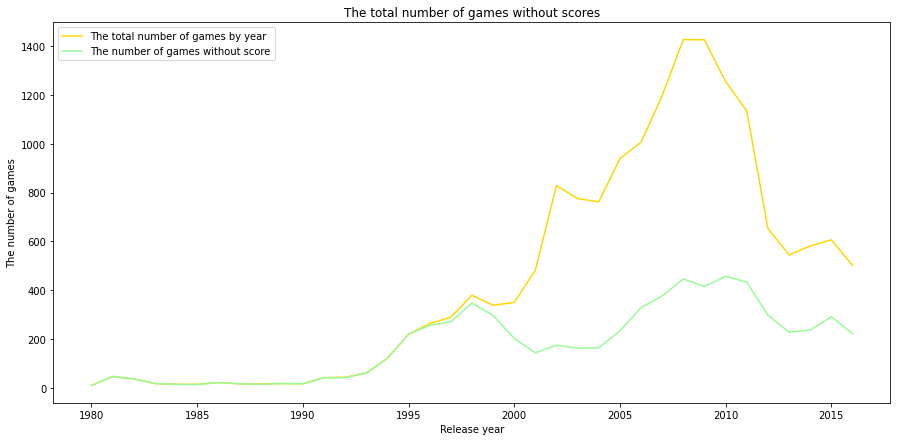

In [28]:

(
    data
    .groupby('year_of_release')
    ['name']
    .count()
    .plot(color='gold', label='The total number of games by year', legend=True, figsize=(15,7))
)

(
    data.query("rating.isnull()")
    .groupby("year_of_release")["name"]
    .count()
    .plot(
        figsize=(15, 7),
        color="palegreen",
        label="The number of games without score",
        legend=True,
        title="The total number of games without scores"),
    )





plt.xlabel('Release year')
plt.ylabel('The number of games')
plt.show()

Missing values for ratings are also common for early years.

In [29]:

data[(data['critic_score'].isnull())].head(30)
#Even based on a sample of 30 rows, it's evident that missing values are present across various platforms and different years.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Most likely, the rating for games will be the same across different platforms, as if a game has a rating of 'T' for one platform, it's unlikely to have a different rating for another platform. Therefore, we can attempt to fill in some of the missing values by using the rating for the same game on another platform. Since ratings are categorical rather than numerical values, we will use the most frequently occurring values. Let's obtain the most common age rating values across different platforms for each game.

In [30]:
def rating_freq(row):
    freq = data[
        (data.index != row.name) &
        (data['name'] == row['name']) &
        (data['rating'].isnull() == False)
    ]['rating'].mode()
    
    if len(freq) == 0:
        return np.NaN
    
    return freq[0]

#Use this values to deal with missings
data.loc[data['rating'].isnull(), 'rating'] = data[data['rating'].isnull()].apply(rating_freq, axis=1)


In [31]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))  

name - 0%
platform - 0%
year_of_release - 0%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 38%


In [32]:
#Missings in text variable are changed for "unknown"
data['rating'] = data['rating'].fillna('unknown')


In [33]:

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))  

name - 0%
platform - 0%
year_of_release - 0%
genre - 0%
na_sales - 0%
eu_sales - 0%
jp_sales - 0%
other_sales - 0%
critic_score - 51%
user_score - 55%
rating - 0%


### Total Sales Across All Regions

In [34]:
data['agg_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,agg_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


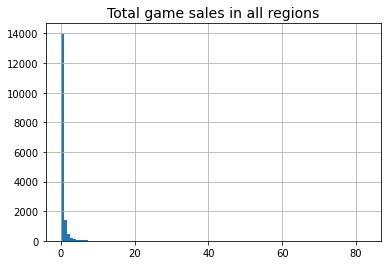

In [35]:
data.hist('agg_sales', bins=100)
plt.title('Total game sales in all regions', size=14)
plt.show();

#According to the graph, a significant portion of total game sales is concentrated around zero.

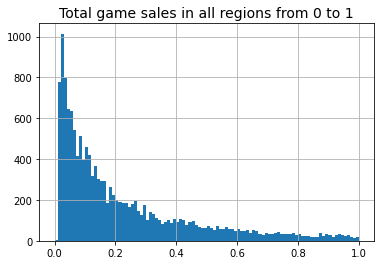

In [36]:
# Hist
data.query('agg_sales <1')['agg_sales'].hist(bins=100)
plt.title('Total game sales in all regions from 0 to 1', size=14)
plt.show();


In [37]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,agg_sales
count,16445.000000,16445.000000,16445.000000,16445.000000,16445.000000,7982.000000,7462.000000,16445.000000
mean,2006.484342,0.264105,0.145952,0.078484,0.047595,68.995114,7.126374,0.536136
std,5.877123,0.818438,0.506710,0.311091,0.188000,13.920770,1.499542,1.558806
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


According to the descriptive statistics for total sales, as well as sales by region, the standard deviation is greater than the mean, indicating the presence of extremely low and high values. This can impact further calculations, such as comparing average sales for different groups, potentially leading to false statistical significance due to the influence of extreme values on the mean. Therefore, we need to address this issue.

In [38]:
# z-test to identify anomalous values

data['z_agg_sales'] = stats.zscore(data['agg_sales'])
display(data.sort_values(by='z_agg_sales', ascending=False))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,agg_sales,z_agg_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,52.608456
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24,25.471471
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,22.443419
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,20.679194
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38,19.787459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15924,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,-0.337535
15925,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,-0.337535
16445,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01,-0.337535
16407,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00,-0.343950


In [39]:
data = data.query("z_agg_sales  < 3")
del data['z_agg_sales']
data['agg_sales'].describe()


count    16260.00000
mean         0.42048
std          0.68354
min          0.00000
25%          0.06000
50%          0.16000
75%          0.45000
max          5.21000
Name: agg_sales, dtype: float64

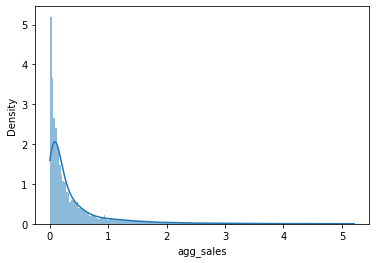

In [40]:
sns.histplot(data['agg_sales'], stat="density", kde=True,  linewidth=0 );


### Summary of Data Preprocessing:

1. Column names have been converted to lowercase.
2. The data type of the 'user_score' column has been changed to numerical, and 'tbd' values ('to be determined') have been replaced with missing values.
3. Missing data has been examined, and it has been observed that missing values in critic ratings, user ratings, and ratings are more common for earlier years, with the highest number of missing values occurring before 2000.
4. For game ratings, 3% of missing values have been imputed by replacing them with the most frequently occurring values for the same game on different platforms.
5. For the release year, only 2% of missing values were present and were removed from the dataset.
6. Missing values for critic and user ratings have been left as they are, as it is not feasible to replace them without compromising data representativeness.
7. Total sales across all regions have been calculated, and extreme outliers have been removed using the z-test. The majority of values in this column are concentrated around zero."






## EDA

###  The Number of Games Released in Different Years

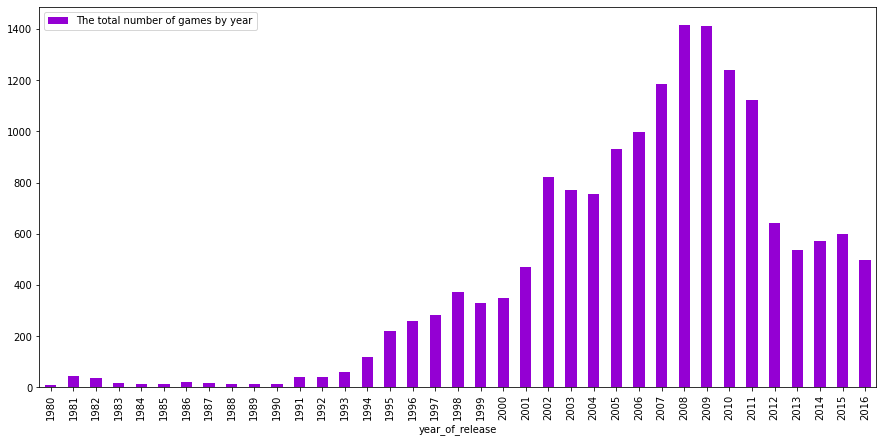

In [41]:
(
    data.groupby("year_of_release")["name"]
    .count()
    .plot(
        kind="bar",
        color="darkviolet",
        label="The total number of games by year",
        legend=True,
        figsize=(15, 7),
    )
);


### Platforms with the Highest Total Sales


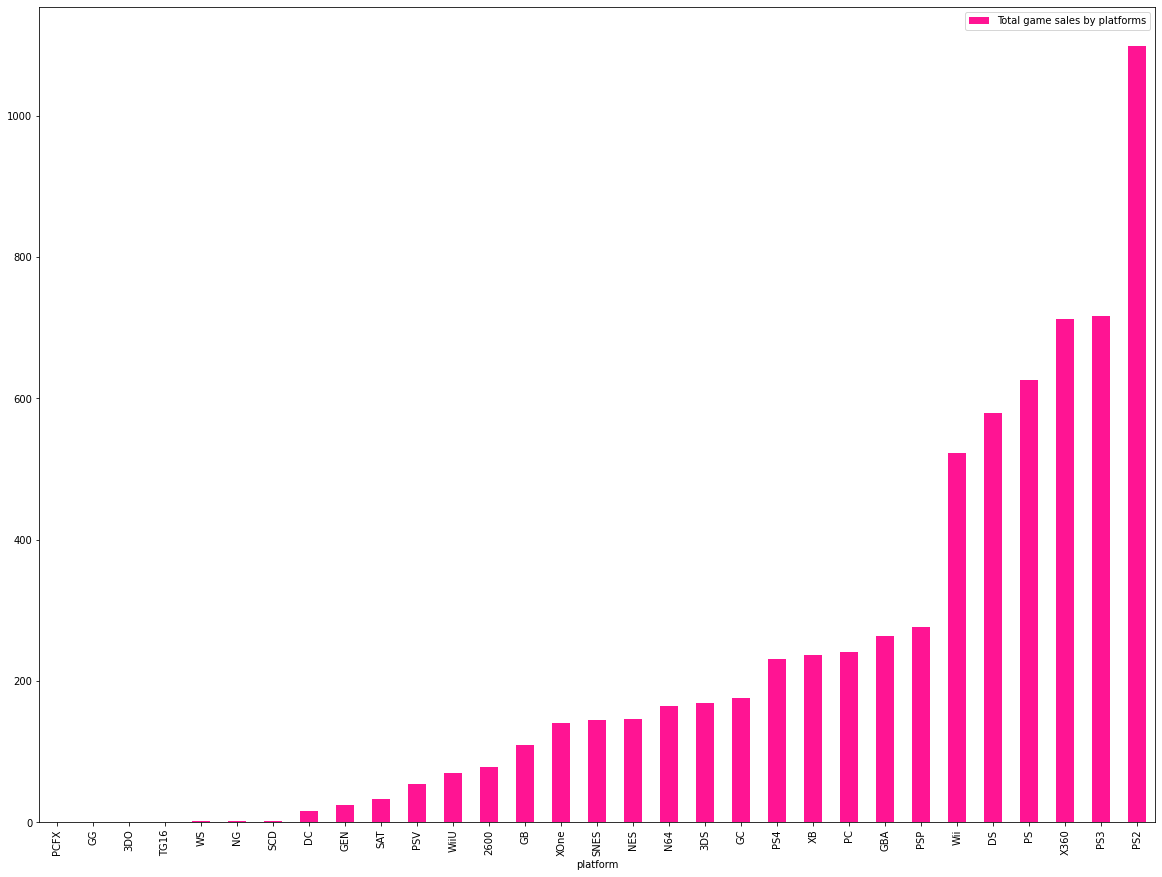

In [42]:
(
    data.groupby("platform")["agg_sales"]
    .sum()
    .sort_values()
    .plot(
        kind="bar",
        color="deeppink",
        label="Total game sales by platforms",
        legend=True,
        figsize=(20, 15),
    )
);

The platforms with the highest total sales are: PS2, PS3, X360, and PS. We will create a chart depicting their annual sales trends.

### Distribution by Year for Platforms with the Highest Total Sales.

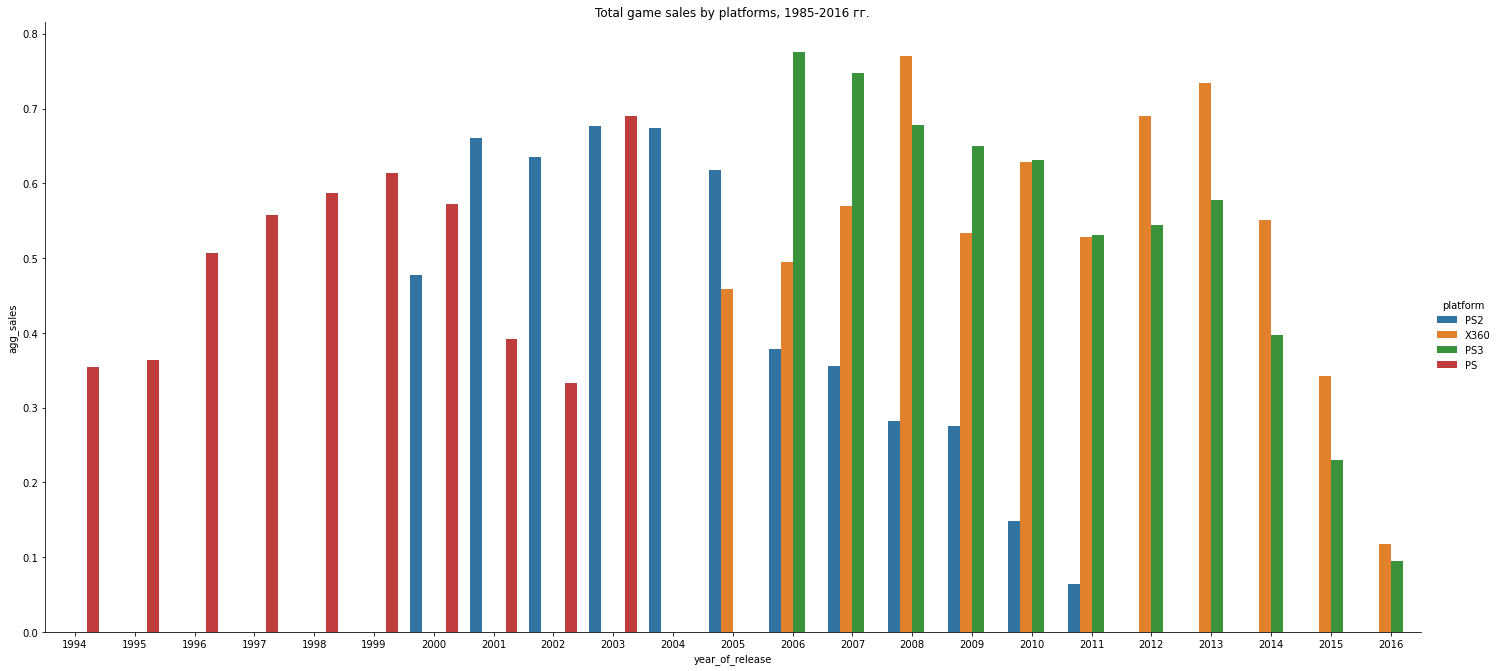

In [43]:
sns.set_palette("tab10")
sns.catplot(
    data=data[data["platform"].isin(("PS2", "PS3", "X360", "PS"))],
    x="year_of_release",
    y="agg_sales",
    hue="platform",
    ci=None,
    kind="bar",
    height=9,
    aspect=2.2,
)

plt.title("Total game sales by platforms, 1985-2016 гг.")
plt.show();






Based on the graph, it appears that the typical lifespan of a gaming platform is approximately 10-11 years. For instance, the PS platform existed from 1994 to 2003, and in 2000, the new PS2 platform was introduced, which remained in existence until 2011. New generations tend to emerge roughly every 7 years. However, I believe that a 10-year span might be too extensive for our analysis.

Upon examining the graph of total sales by platforms, it is evident that sales tend to decline after the initial years of a platform's release. Additionally, the chart depicting the overall number of games shows a sharp decrease starting in 2012. Consequently, for the purposes of our forecasting, I would prefer to focus on the most recent 4-year period, spanning from 2012 to 2016.

In [44]:
.
data_new = data.query("year_of_release  >2011")
data_new['year_of_release'].value_counts()

2012    642
2015    601
2014    571
2013    535
2016    499
Name: year_of_release, dtype: int64

In [45]:
data_new.shape


(2848, 12)

###  Which platforms are leading in sales, and are their sales trending upwards or downwards?

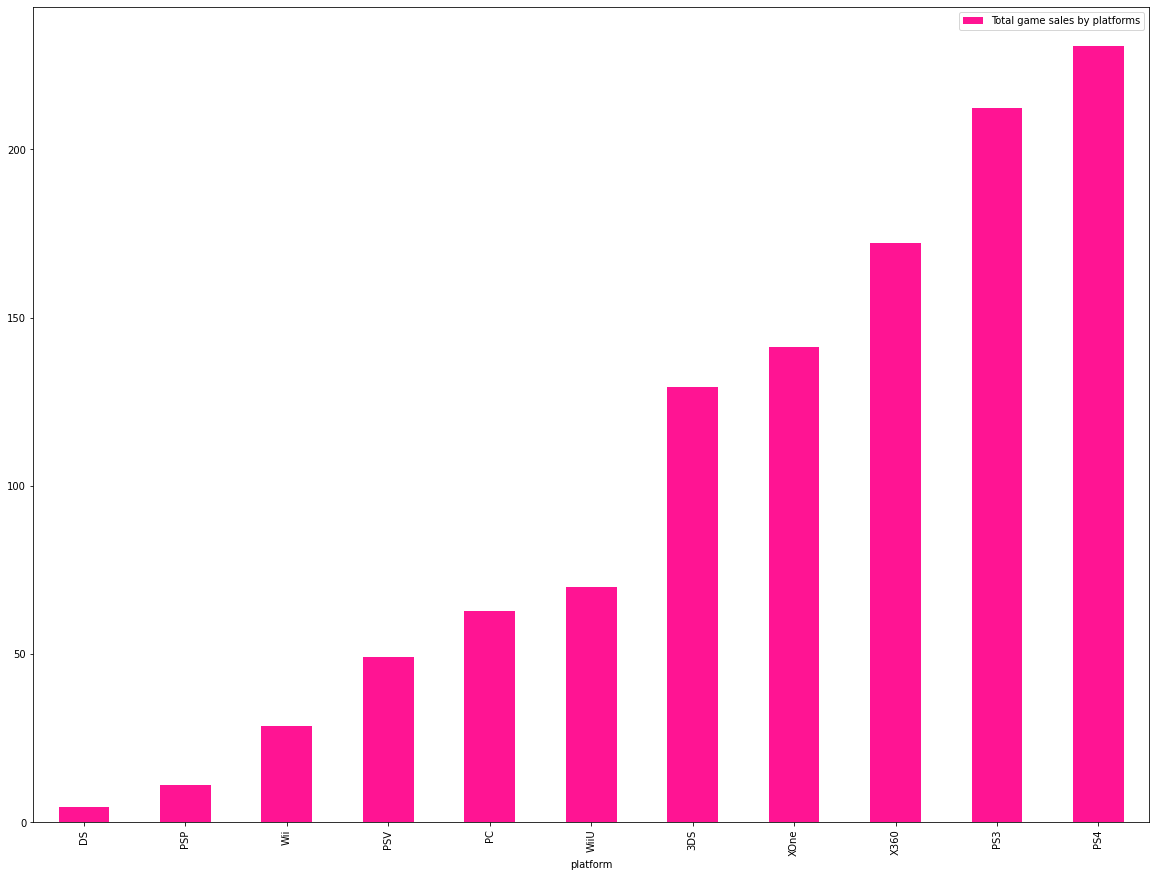

In [46]:

(
    data_new.groupby("platform")["agg_sales"]
    .sum()
    .sort_values()
    .plot(
        kind="bar",
        color="deeppink",
        label="Total game sales by platforms",
        legend=True,
        figsize=(20, 15),
    )
);

#Top: PS4, PS3, X360

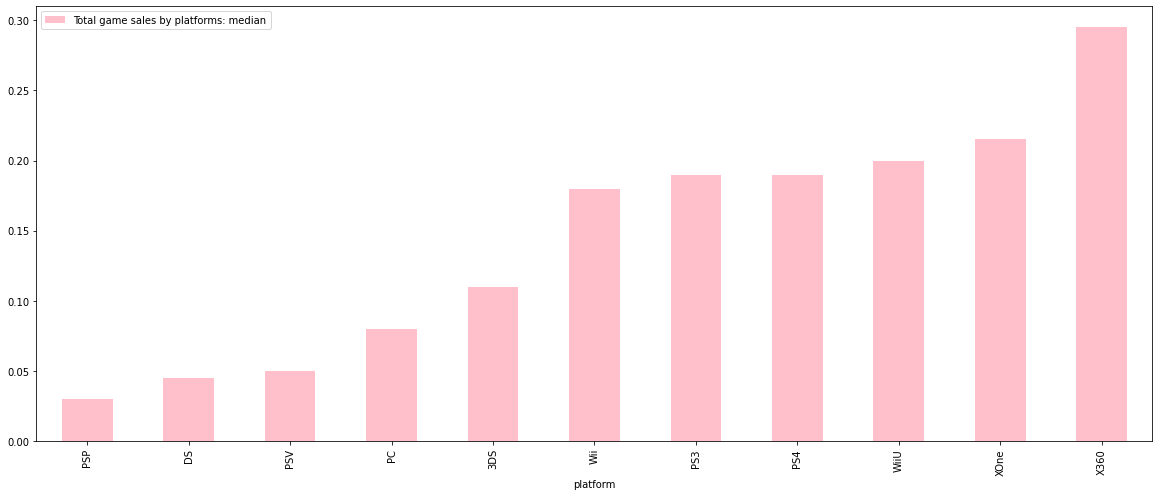

In [47]:
#Median
(
    data_new.groupby("platform")["agg_sales"]
    .median()
    .sort_values()
    .plot(
        kind="bar",
        color="pink",
        label="Total game sales by platforms: median",
        legend=True,
        figsize=(20, 8),
    )
);




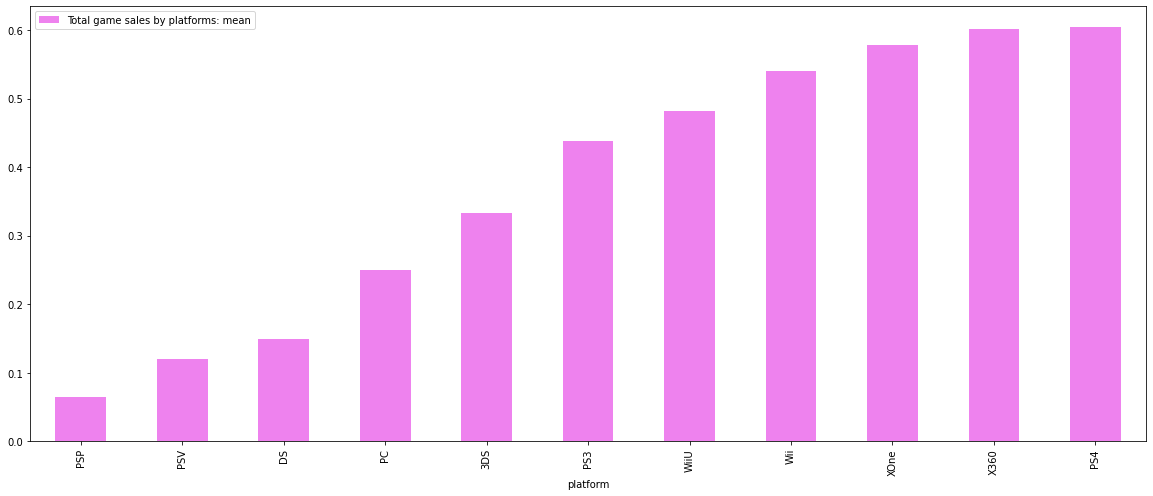

In [48]:
#Mean
(
    data_new.groupby("platform")["agg_sales"]
    .mean()
    .sort_values()
    .plot(
        kind="bar",
        color="violet",
        label="Total game sales by platforms: mean",
        legend=True,
        figsize=(20, 8),
    )
);



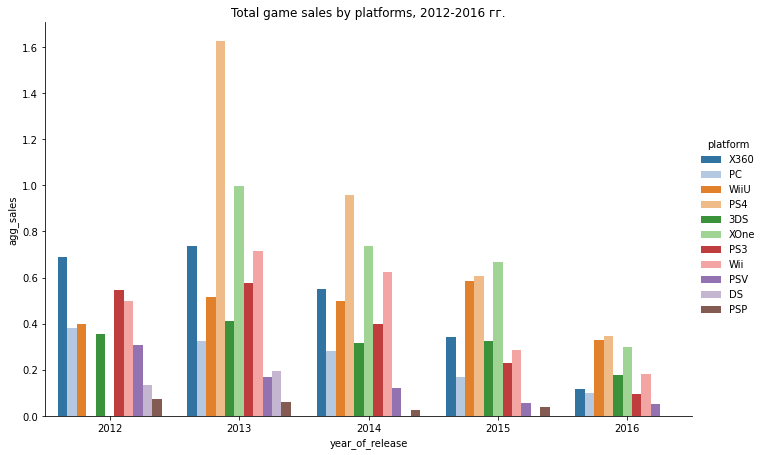

In [49]:

sns.catplot(
    data=data_new, x="year_of_release", y="agg_sales", hue="platform",
    ci=None, kind='bar', height=6, aspect=1.6, palette='tab20'
);

plt.title('Total game sales by platforms, 2012-2016 гг.')
plt.show()


Most platforms experience sales growth in the first 2 years, followed by a decline. On average, the lifecycle of a platform is approximately 11 years.

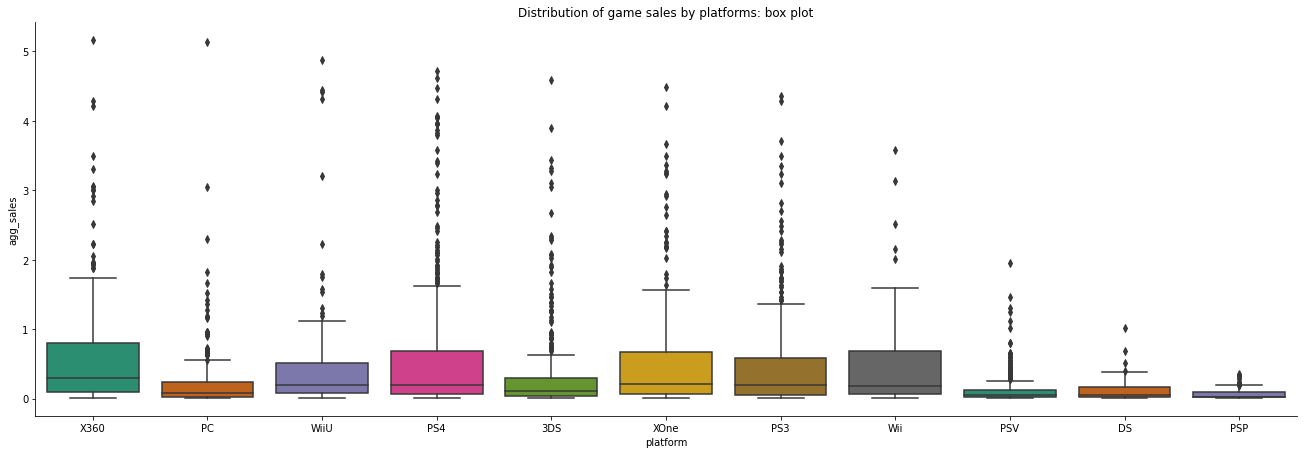

In [50]:
sns.catplot(
    data=data_new,
    x="platform",
    y="agg_sales",
    kind="box",
    height=6,
    aspect=3,
    palette="Dark2",
);

plt.title("Distribution of game sales by platforms: box plot")
plt.show()



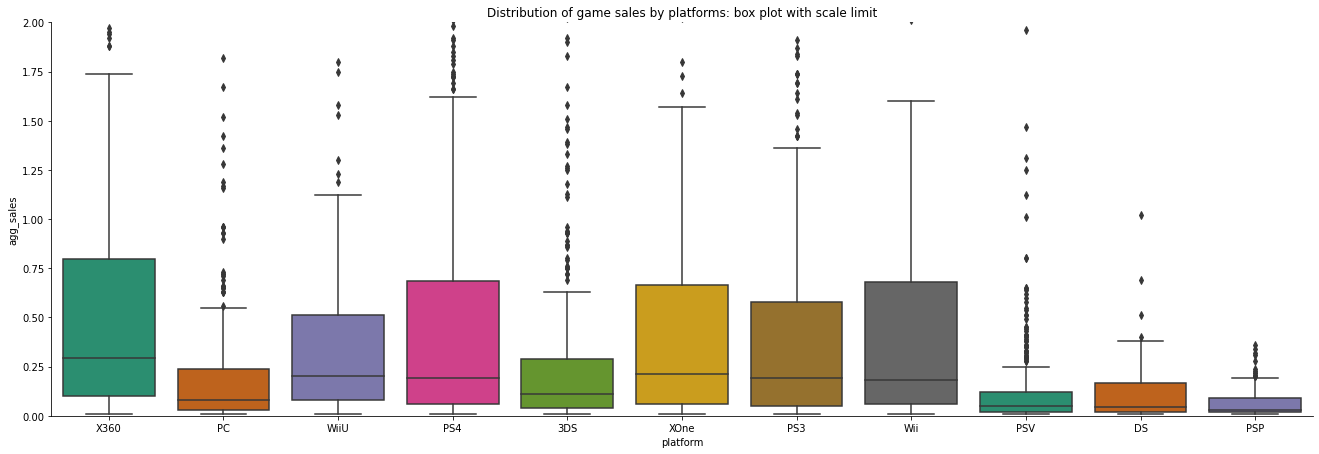

In [51]:
# ylim option
sns.catplot(
    data=data_new,
    x="platform",
    y="agg_sales",
    kind="box",
    height=6,
    aspect=3,
    palette="Dark2",
).set(ylim=(0, 2));

plt.title("Distribution of game sales by platforms: box plot with scale limit")
plt.show()


According to the box plot:

1. The highest median value is observed for X360.
2. The highest values of the upper quartile are seen for X360, PS4, Xone, and Wii.
3. The least variability in values is found in PSP.
4. All platforms exhibit outliers.

In [52]:
 
data_new.groupby('platform')['agg_sales'].describe()

#The highest average values are observed for PS4 and X360, with X360 having a lower standard deviation.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,389.0,0.332519,0.612965,0.01,0.04,0.110,0.2900,4.59
DS,30.0,0.149667,0.233998,0.01,0.02,0.045,0.1675,1.02
PC,250.0,0.250600,0.494640,0.01,0.03,0.080,0.2400,5.14
PS3,485.0,0.437918,0.636476,0.01,0.05,0.190,0.5800,4.36
PS4,382.0,0.604162,0.956901,0.01,0.06,0.190,0.6850,4.72
PSP,173.0,0.064682,0.071296,0.01,0.02,0.030,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.02,0.050,0.1200,1.96
Wii,53.0,0.539811,0.808773,0.01,0.06,0.180,0.6800,3.58
WiiU,145.0,0.481862,0.826431,0.01,0.08,0.200,0.5100,4.87


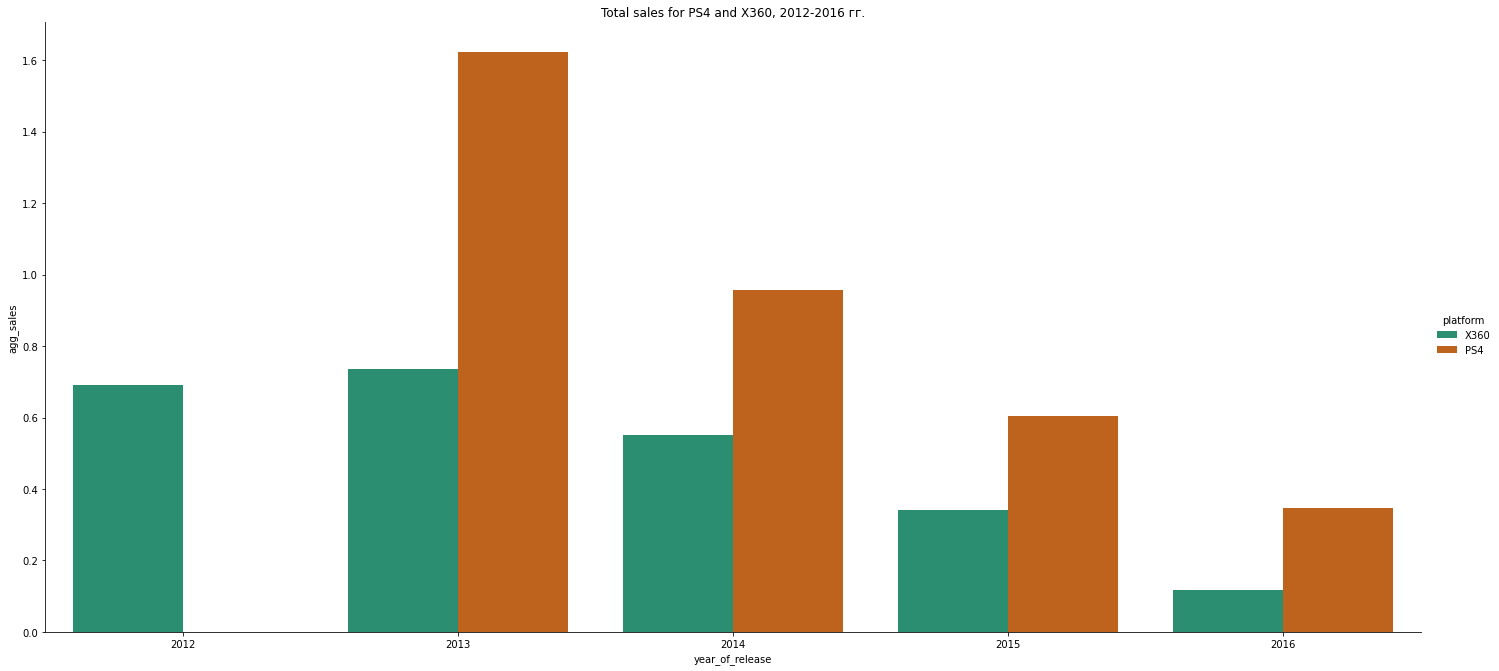

In [53]:

sns.set_palette("Dark2")
sns.catplot(
    data=data_new[data_new["platform"].isin(("PS4", "X360"))],
    x="year_of_release",
    y="agg_sales",
    hue="platform",
    ci=None,
    kind="bar",
    height=9,
    aspect=2.2,
);

plt.title("Total sales for PS4 and X360, 2012-2016 гг.")
plt.show()


Among all platforms, two platforms have the highest average sales values, with PS4 having slightly lower market presence compared to X360. Therefore, it can be inferred that, on average, PS4 is the more popular platform in terms of sales.

### User and crtitique scores

In [54]:

data_ps4 =data_new.loc[data_new['platform'] == 'PS4']

data_ps4.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,agg_sales
224,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,M,4.72
230,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
244,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
260,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,NaN,NaN,unknown,4.32
288,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07


In [55]:
data_ps4.shape


(382, 12)

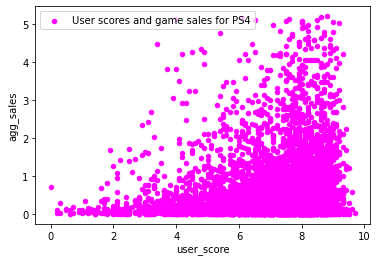

In [56]:


data.plot(
    x="user_score",
    y="agg_sales",
    kind="scatter",
    color="magenta",
    label="User scores and game sales for PS4",
);




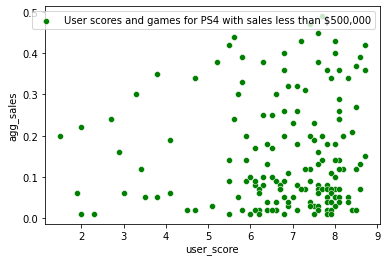

In [57]:
sns.scatterplot(
    label="User scores and games for PS4 with sales less than $500,000",
    color="green",
    y="agg_sales",
    x="user_score",
    data=data_ps4.query("agg_sales < 0.5"),
);

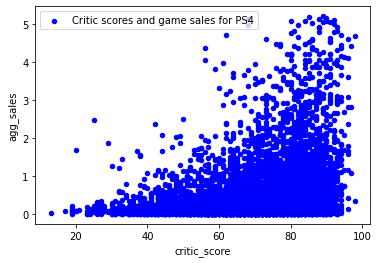

In [58]:


data.plot(
    x="critic_score",
    y="agg_sales",
    kind="scatter",
    color="blue",
    label="Critic scores and game sales for PS4",
);





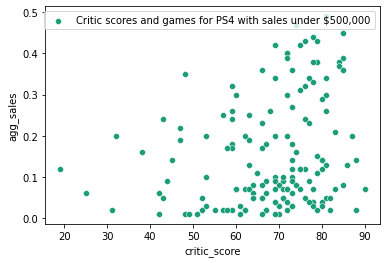

In [59]:
sns.scatterplot(
    label="Critic scores and games for PS4 with sales under $500,000",
    y="agg_sales",
    x="critic_score",
    data=data_ps4.query("agg_sales < 0.5"),
);


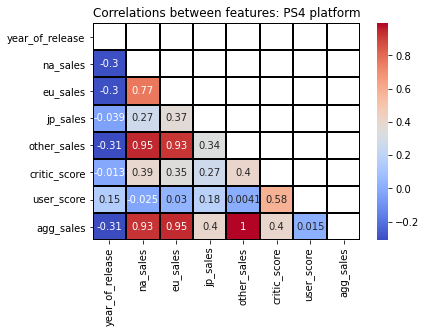

In [60]:
matrix = np.triu(data_ps4.corr())
sns.heatmap(
    data_ps4.corr(),
    annot=True,
    mask=matrix,
    cmap="coolwarm",
    linewidths=1,
    linecolor="black",);
plt.title("Correlations between features: PS4 platform")
plt.show()

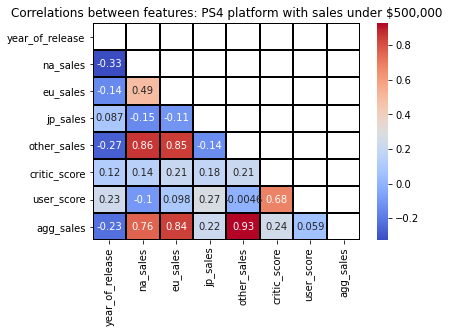

In [61]:
matrix = np.triu(data_ps4.query("agg_sales < 0.5").corr())
sns.heatmap(
    data_ps4.query("agg_sales < 0.5").corr(),
    annot=True,
    mask=matrix,
    cmap="coolwarm",
    linewidths=1,
    linecolor="black",);
plt.title("Correlations between features: PS4 platform with sales under $500,000")
plt.show()

According to the correlation analysis for PS4, user reviews do not show a significant relationship with sales. The correlation coefficient between total sales and critic reviews is +0.4, indicating a positive correlation. However, when examining sales below 500,000 units, the correlation weakens and becomes even smaller.

In [62]:

data_except_ps4 =data_new.loc[data_new['platform'] != 'PS4']

data_except_ps4.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,agg_sales
189,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90.0,6.1,E,5.16
191,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.00,0.54,88.0,4.0,M,5.14
215,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,unknown,4.87
234,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49


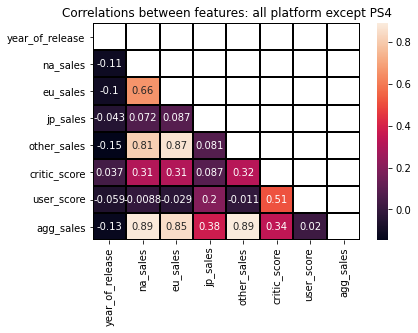

In [63]:
matrix = np.triu(data_except_ps4.corr())
sns.heatmap(
    data_except_ps4.corr(), annot=True, mask=matrix, linewidths=1, linecolor="black");
plt.title("Correlations between features: all platform except PS4")
plt.show()


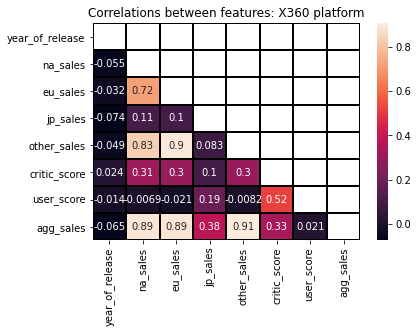

In [64]:

data_x360 =data_new.loc[data_new['platform'] != 'X360']

matrix = np.triu(data_x360.corr())
sns.heatmap(data_x360.corr(), annot=True, mask=matrix, linewidths=1, linecolor="black");
plt.title("Correlations between features: X360 platform")
plt.show()



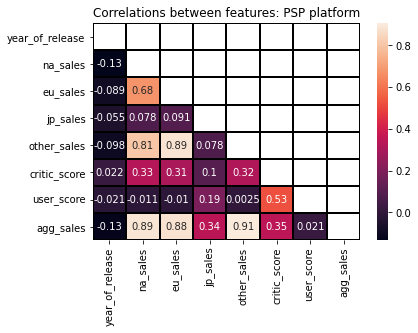

In [65]:

data_psp =data_new.loc[data_new['platform'] != 'PSP']

matrix = np.triu(data_psp.corr())
sns.heatmap(data_psp.corr(), annot=True, mask=matrix, linewidths=1, linecolor='black');
plt.title('Correlations between features: PSP platform')
plt.show()

The conclusions for other platforms, even when considering X360 and PSP separately, are generally similar to PS4. User reviews have little to no correlation with sales, while critic reviews show a weak positive relationship.

### Genres

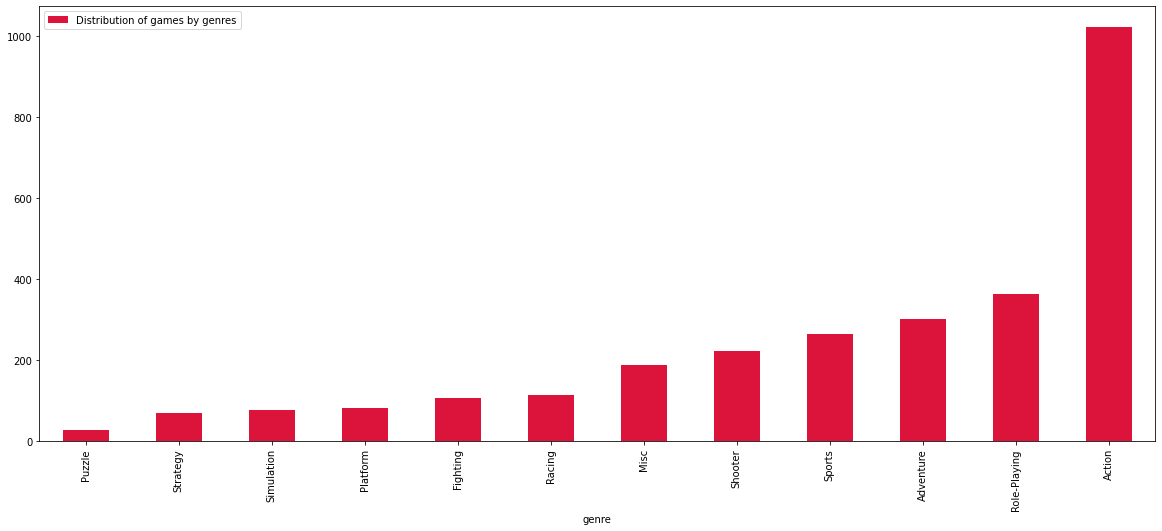

In [66]:


(
    data_new.groupby("genre")["name"]
    .count()
    .sort_values()
    .plot(
        kind="bar",
        color="crimson",
        label="Distribution of games by genres",
        legend=True,
        figsize=(20, 8),)
);

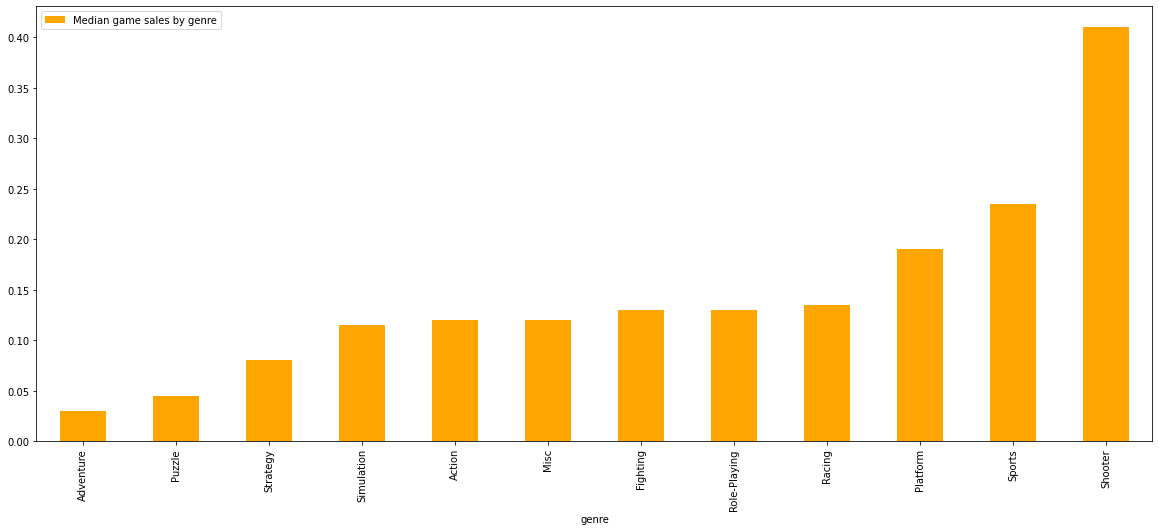

In [67]:

(
    data_new.groupby("genre")["agg_sales"]
    .median()
    .sort_values()
    .plot(
        kind="bar",
        color="orange",
        label="Median game sales by genre",
        legend=True,
        figsize=(20, 8),
    )
);

In [68]:
data_new.pivot_table(columns='genre', values='agg_sales', aggfunc='median')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
agg_sales,0.12,0.03,0.13,0.12,0.19,0.045,0.135,0.13,0.41,0.115,0.235,0.08


In [69]:

sum_sales=data_new.groupby('genre')['agg_sales'].sum()
game_count=data_new.groupby('genre')['name'].count()
share=sum_sales/game_count
display(share.sort_values())
  

genre
Adventure       0.097450
Puzzle          0.174643
Strategy        0.187887
Simulation      0.265769
Misc            0.337725
Fighting        0.342037
Action          0.351857
Role-Playing    0.394932
Racing          0.407105
Platform        0.552651
Sports          0.577083
Shooter         0.869955
dtype: float64

1. Action games lead in terms of quantity, but shooters, sports, and platform games have the highest median sales.
2. When considering sales per game, shooters emerge as the most profitable.
3. Puzzle games had the fewest releases and also ranked among the least successful in terms of median sales. Adventure games had the lowest median sales.
4. When calculating sales per game, adventures and puzzles yield the lowest profits.


### Summary

<strong> Game Releases by Year </strong>

Based on the graph depicting the number of games released each year, it is evident that the relevant period begins from 2012 onwards, as the number of game releases started to decline compared to the earlier period.

<strong> Game sales by platform </strong>
1. The leading platforms in terms of total sales across all years are PS2, PS3, X360, and PS.
2. For the contemporary period from 2012 to 2016, the leading platforms are PS4, PS3, and X360.
3. Potentially profitable platforms include PS4 and XOne. For other previously profitable platforms, such as X360 (released in 2005) and PS3 (released in 2006), their lifecycle is ending, and it's likely that sales will continue to decline in the future.
4. User reviews have little to no correlation with sales, both within the popular platform PS4 and for all other platforms, including PSP and X360.
5. Critic reviews show a weak positive correlation with sales, both within PS4 and for all other platforms. However, for games with total sales below $500,000, the correlation becomes even weaker.

<strong> Sales by genres </strong> 

1. The action genre has the highest number of games, followed by role-playing and adventure games. Adventure games are the least popular genre.
2. When considering sales per game, shooters emerge as the most profitable and also have the highest median sales.


## The User Profile for Each Region

### Top platforms

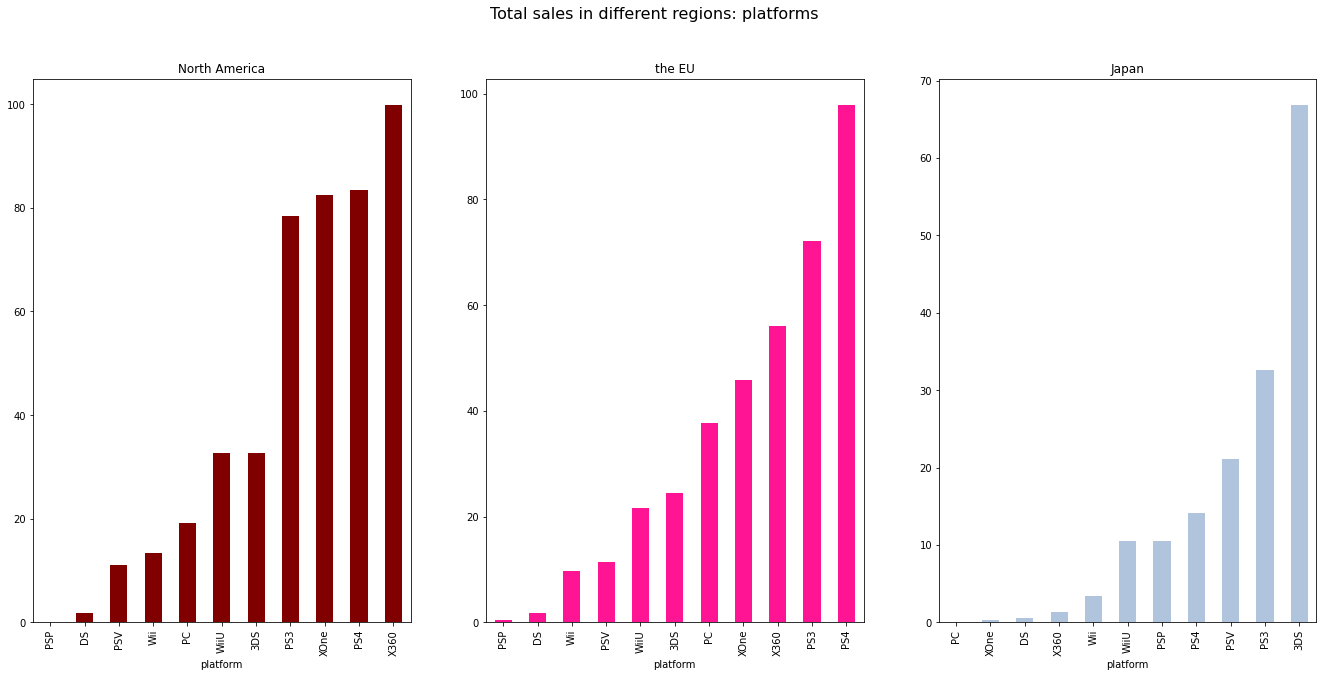

In [70]:
fig, (g1, g2, g3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(23, 10)
)

data_new.groupby('platform')['na_sales'].sum().sort_values().plot.bar(ax=g1, color='maroon')
data_new.groupby('platform')['eu_sales'].sum().sort_values().plot.bar(ax=g2, color='deeppink')
data_new.groupby('platform')['jp_sales'].sum().sort_values().plot.bar(ax=g3, color='lightsteelblue')

fig.suptitle('Total sales in different regions: platforms', fontsize=16)


g1.set_title('North America')
g2.set_title('the EU')
g3.set_title('Japan')
plt.show()

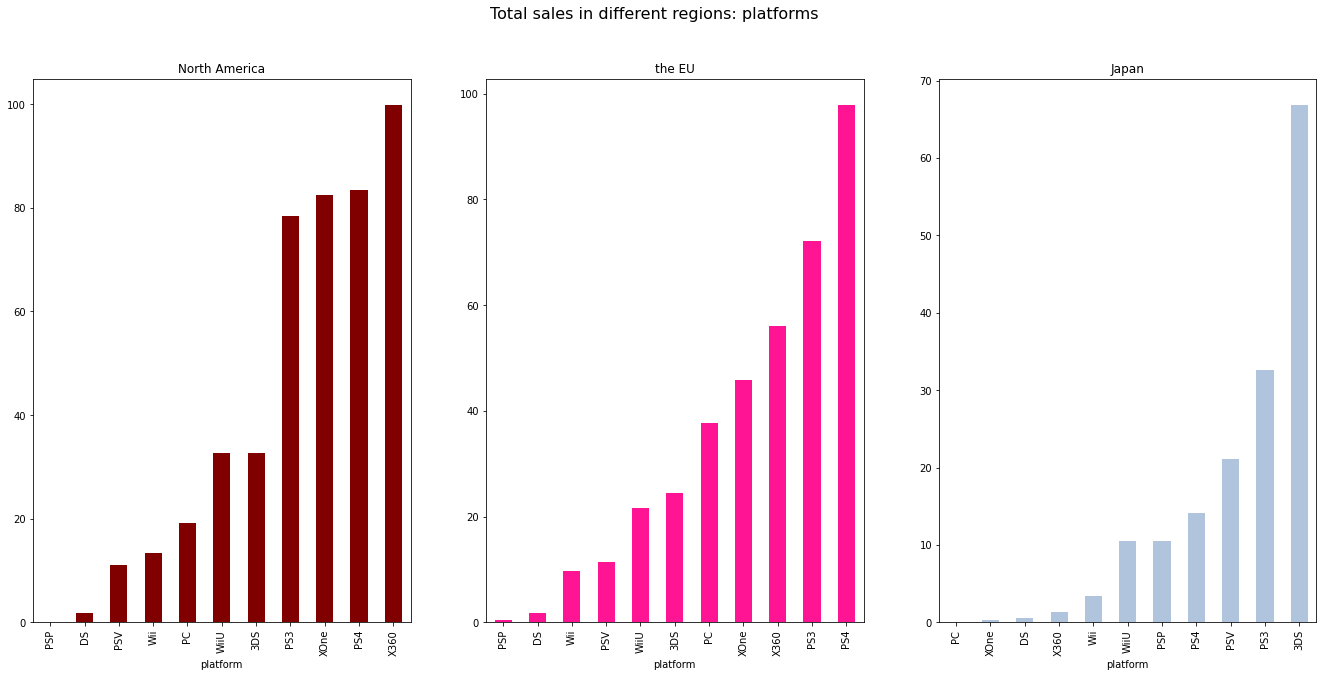

In [71]:
fig, (g1, g2, g3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(23, 10)
)

data_new.groupby('platform')['na_sales'].sum().sort_values().plot.bar(ax=g1, color='maroon')
data_new.groupby('platform')['eu_sales'].sum().sort_values().plot.bar(ax=g2, color='deeppink')
data_new.groupby('platform')['jp_sales'].sum().sort_values().plot.bar(ax=g3, color='lightsteelblue')

fig.suptitle('Total sales in different regions: platforms', fontsize=16)


g1.set_title('North America')
g2.set_title('the EU')
g3.set_title('Japan')
plt.show()

### The most popular genres

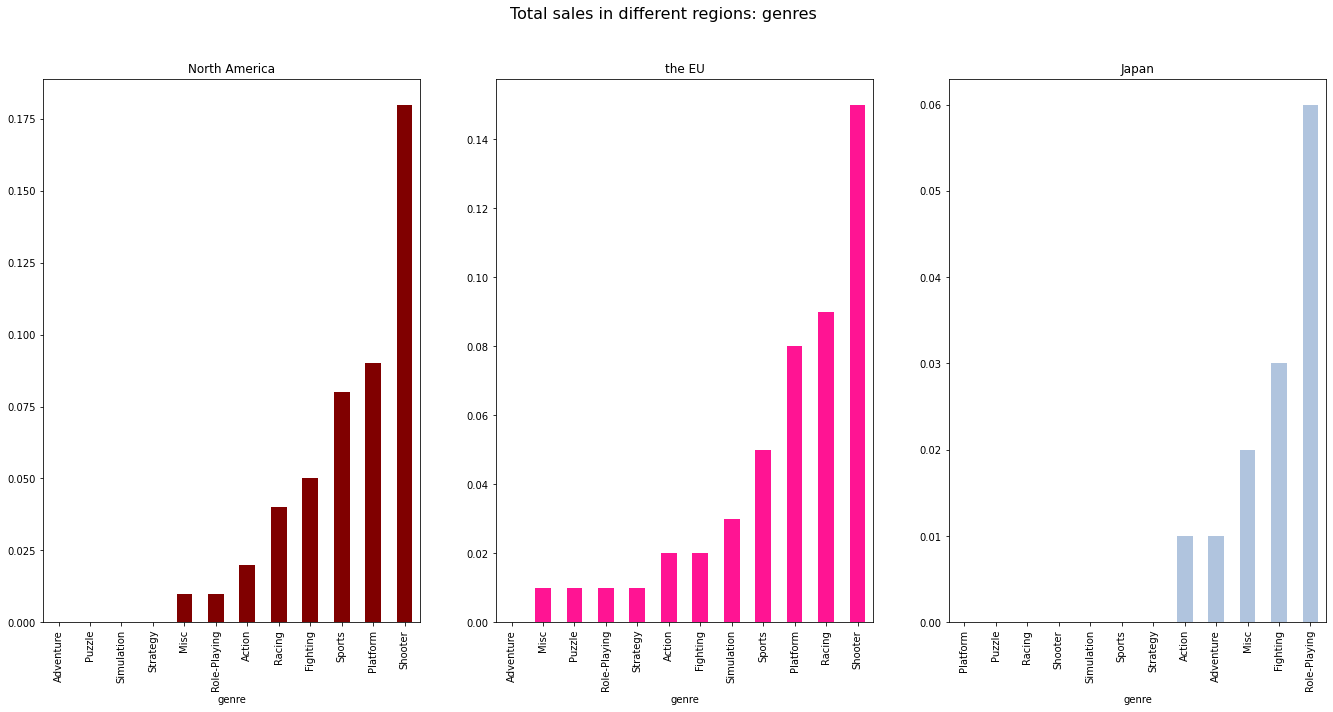

In [72]:
fig, (g1, g2, g3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(23, 10)
)

data_new.groupby('genre')['na_sales'].median().sort_values().plot.bar(ax=g1, color='maroon')
data_new.groupby('genre')['eu_sales'].median().sort_values().plot.bar(ax=g2, color='deeppink')
data_new.groupby('genre')['jp_sales'].median().sort_values().plot.bar(ax=g3, color='lightsteelblue')

fig.suptitle('Total sales in different regions: genres', fontsize=16)

g1.set_title('North America')
g2.set_title('the EU')
g3.set_title('Japan')
plt.show()


### Does the ESRB rating impact sales in a particular region?

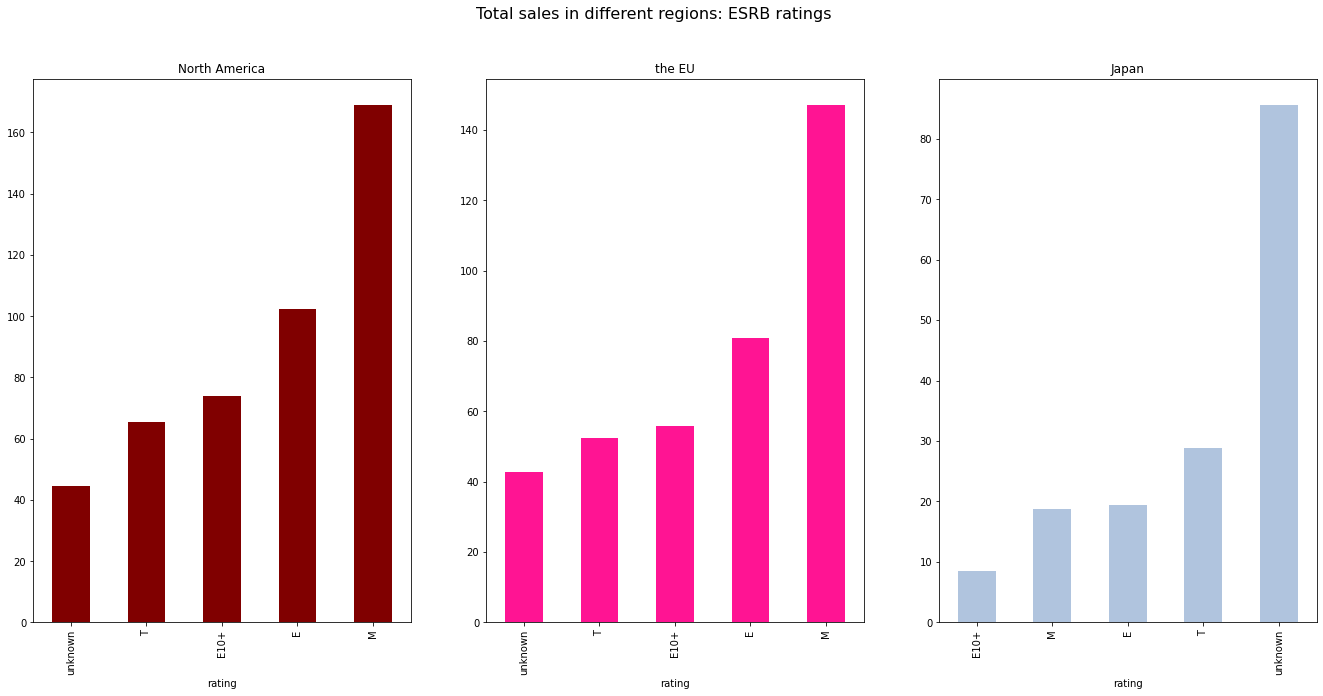

In [73]:
fig, (g1, g2, g3) = plt.subplots(
    nrows=1, ncols=3,
    figsize=(23, 10)
)

data_new.groupby('rating')['na_sales'].sum().sort_values().plot.bar(ax=g1, color='maroon')
data_new.groupby('rating')['eu_sales'].sum().sort_values().plot.bar(ax=g2, color='deeppink')
data_new.groupby('rating')['jp_sales'].sum().sort_values().plot.bar(ax=g3, color='lightsteelblue')

fig.suptitle('Total sales in different regions: ESRB ratings', fontsize=16)

g1.set_title('North America')
g2.set_title('the EU')
g3.set_title('Japan')
plt.show()


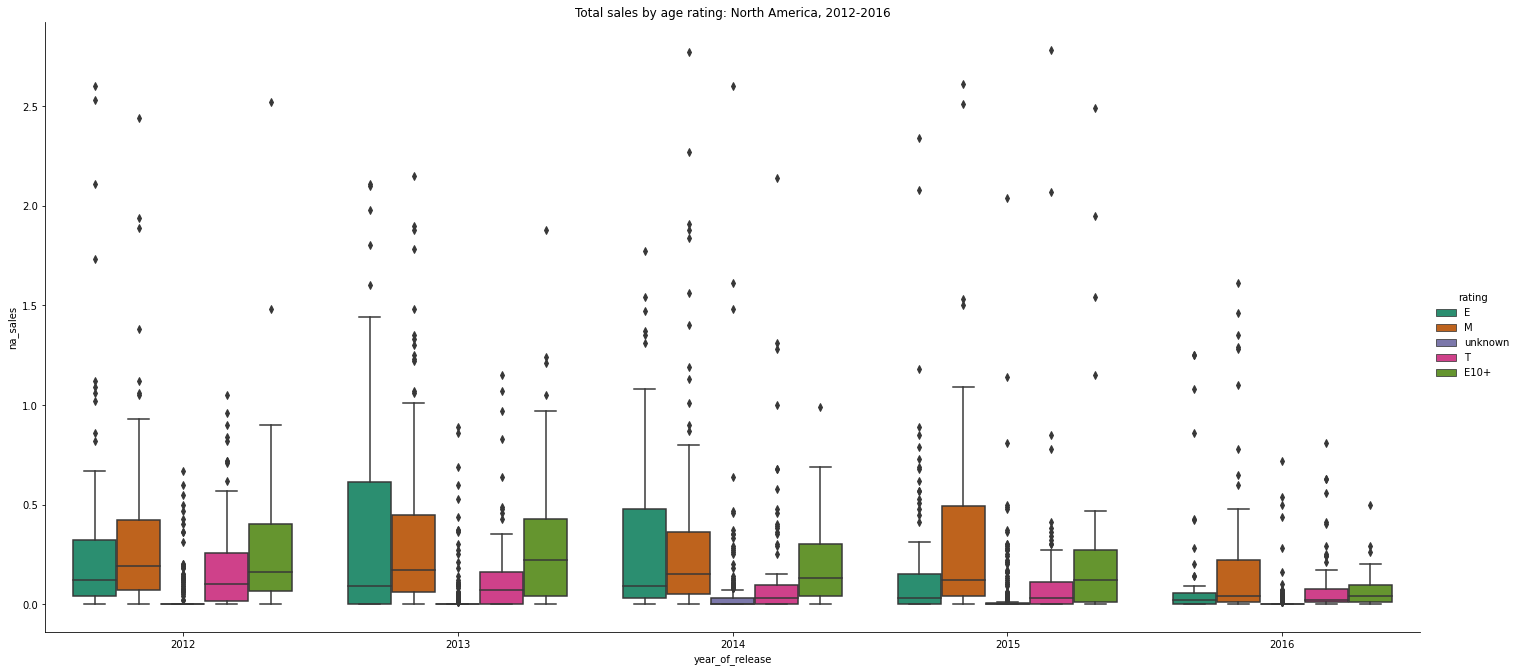

In [74]:

sns.set_palette('Dark2')
sns.catplot(
    data=data_new, x="year_of_release", y="na_sales", hue="rating", kind='box',
     height=9, aspect=2.2
);

plt.title('Total sales by age rating: North America, 2012-2016')
plt.show()


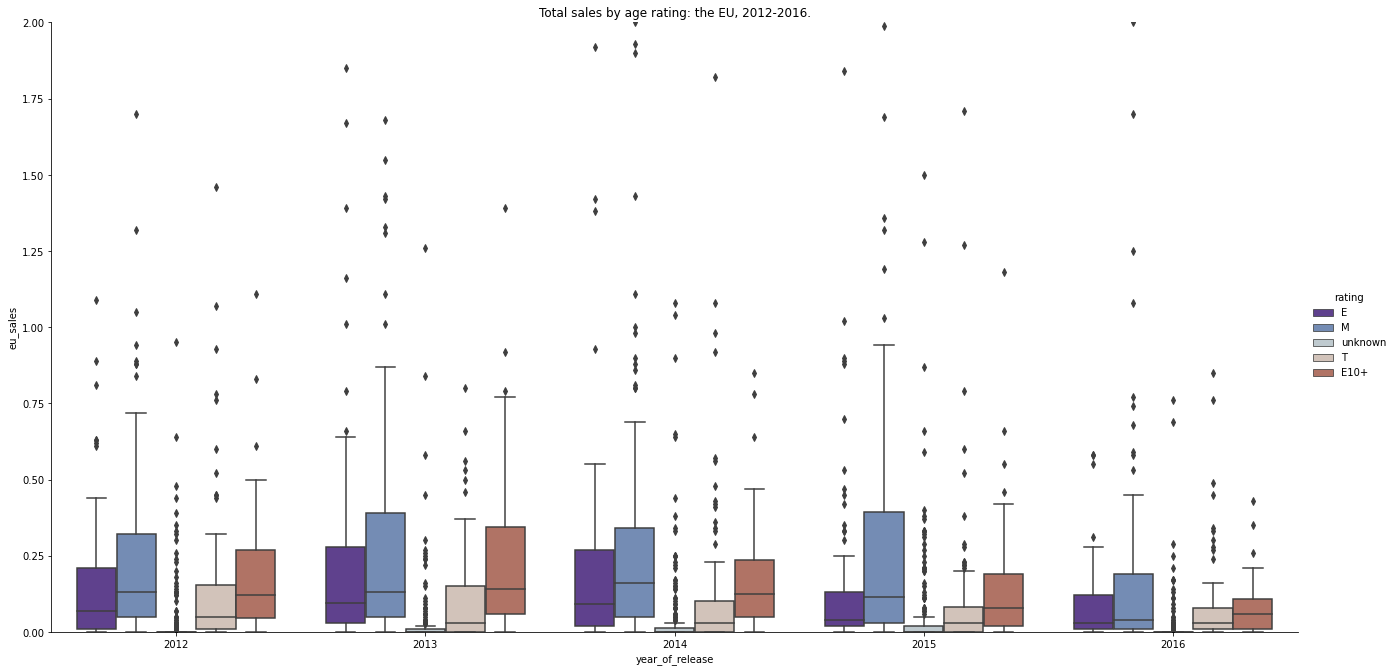

In [75]:
sns.set_palette('twilight_shifted')

sns.catplot(data=data_new, x="year_of_release", y="eu_sales", hue="rating", kind='box', height=9, aspect=2).set(ylim=(0, 2));

plt.title('Total sales by age rating: the EU, 2012-2016.')
plt.show()

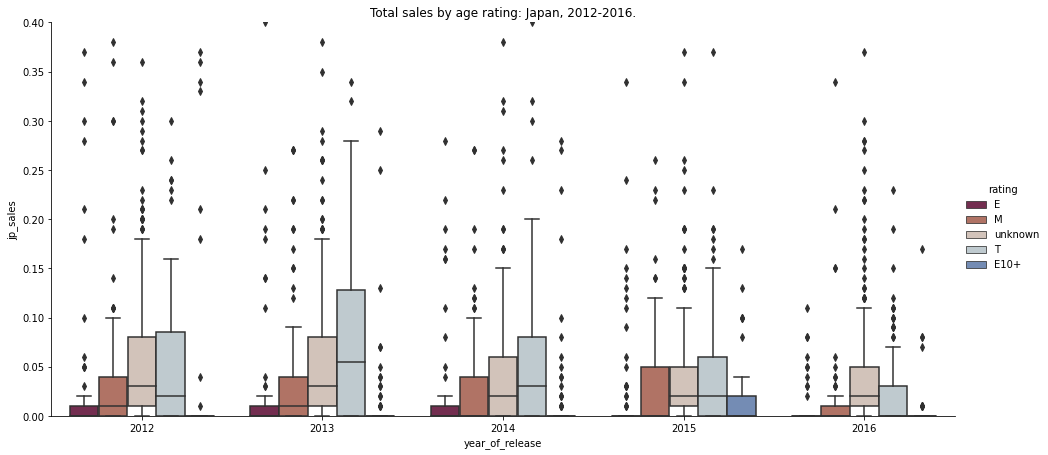

In [76]:
sns.set_palette('twilight_shifted_r')
sns.catplot(
    data=data_new, x="year_of_release", y="jp_sales", hue="rating", kind='box',
     height=6, aspect=2.2).set(ylim=(0, 0.4));

plt.title('Total sales by age rating: Japan, 2012-2016.')
plt.show()

### Conclusion
<strong> Top platforms </strong>
 For North America and Europe, the top popular platforms are similar - PS3, PS4, Xbox 360, and Xbox One. In North America, the Xbox 360 console takes the lead, while in Europe, Sony consoles, particularly the PS4 and PS3, dominate. The fifth position differs for these regions, with PC being the choice in Europe and 3DS in North America. In Japan, the Nintendo 3DS console is the top choice, followed by PS3, PS Vita, PS4, and PSP. It can be assumed that users in different regions have preferences for platforms from different manufacturers, which may be attributed to pricing variations in different regions. 

<strong> Top genres </strong> 

In Europe and North America, the top genre is similar: shooters. Beyond that, the rankings diverge:

North America: platformers, sports, fighting, and racing follow.
Europe: racing, platformers, sports, and simulations follow.

In Japan, the top 5 genres differ from the other two regions:

1. Role-playing games
2. Action
3. Miscellaneous (games not falling into other categories)
4. Adventure
5. Sports
This means that while shooters are popular in North America and Europe, they don't hold the top position for total sales in Japan.


<strong> Age ratings and sales </strong>

1. The most popular rating in North America and Europe is 'M' (Mature), indicating games for adults. Interestingly, these games maintained their popularity from 2012 to 2016. Mature-rated games slightly trailed in total sales compared to 'E' (Everyone) rated games, which ranked second in popularity. However, the median sales for both adult and children's games were similar.

2. In Japan, a significant portion of games lacks a rating, suggesting that the rating system may not be as relevant or influential in this country. Among rated games, the most popular category is 'T' (Teen), indicating games for ages 13 and older. These games consistently held the top position in popularity from 2012 to 2016. The next in line are 'E' (Everyone) rated games.

## Statisitcal analysis


### Are the average user ratings for the Xbox One and PC platforms the same?
To test this hypothesis, I will conduct a two-tailed t-test with a significance level of p-value < 0.05. In this example, the interest lies in whether the user ratings are equal for the two platforms, regardless of whether they are greater or less. The standard significance level is sufficient for assessing the hypothesis since there is no special need to use a smaller probability of making a Type I error when rejecting the null hypothesis.

H0: The average user ratings for the Xbox One and PC platforms are the same.
Ha: The average user ratings for the Xbox One and PC platforms are not the same.

In [77]:

data_clean= data_new.dropna(subset=['user_score'])
data_clean['user_score'].astype('float')



189      6.1
191      4.0
230      8.1
234      8.4
241      6.4
        ... 
16374    6.6
16383    8.5
16385    5.1
16391    6.7
16423    7.6
Name: user_score, Length: 1504, dtype: float64

In [78]:
data_clean['user_score'].isna().sum()

0

In [79]:
xone= data_clean[data_clean['platform']=='XOne']
pc = data_clean[data_clean['platform']=='PC']
alpha=0.05
results_test1=stats.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)
print('p-value:', results_test1.pvalue)

if (results_test1.pvalue < alpha):
    print("The average user scores for Xbox One and PC are different.")
else:
    print("The average user ratings for Xbox One and PC do not statistically differ significantly")


p-value: 0.5562471579800379
The average user ratings for Xbox One and PC do not statistically differ significantly


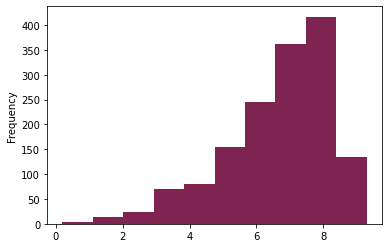

In [80]:
#The test results can be trusted if user scores follow a distribution close to normal. Let's check this. 
data_clean['user_score'].plot.hist();

#According to the graph, the distribution appears skewed. 

Let's conduct a Shapiro-Wilk test for normality. This test assesses a sample of data and provides a quantitative estimate of the probability that the data was drawn from a Gaussian distribution. However, the test is considered reliable for testing normality with small data samples, such as a thousand observations or fewer.


In [81]:

stat1, p1= stats.shapiro(data_clean['user_score'])
print('p-value', p1) 

if (p1 < alpha):
    
    print("Non normal distribution")
else:
    print("Normal distribution")



p-value 4.457518942114383e-26
Non normal distribution


In [82]:
data_clean.shape
#The sample consists of 1504 rows, so I will also perform another test.

(1504, 12)

In [83]:
stat2, p2 = stats.normaltest(data_clean['user_score'])
print ('p-value:', p2)

if (p2 < alpha):
    
    print("Non normal distribution")
else:
    print("Normal distribution")

    
    


p-value: 3.3541891690959326e-44
Non normal distribution


In [84]:
rank_test1=stats. mannwhitneyu (xone['user_score'], pc['user_score'], alternative='two-sided')

print('p-value:', rank_test1.pvalue)

if (rank_test1.pvalue < alpha):
    print("The average user scores for Xbox One and PC are different.")
else:
    print("The average user ratings for Xbox One and PC do not statistically differ significantly")





p-value: 0.8598641836107676
The average user ratings for Xbox One and PC do not statistically differ significantly


### Are the average user ratings for the Action and Sports genres different?


In [85]:
action= data_clean[data_clean['genre']=='Action']
sports= data_clean[data_clean['genre']=='Sports']

alpha=0.05

results_test1=stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print('p-value:', results_test1.pvalue)

if (results_test1.pvalue < alpha):
      print("The average user ratings for action and sports genre games are different.")
else:
    print("The average user ratings for action and sports genre games do not differ significantly.")
   

p-value: 6.789132122869107e-19
The average user ratings for action and sports genre games are different.


In [86]:
rank_test2=stats. mannwhitneyu (action['user_score'], sports['user_score'], alternative='two-sided')

print('p-value:', rank_test2.pvalue)

if (rank_test2.pvalue < alpha):
    
    print("The average user ratings for action and sports genre games are different.")
else:
    print("The average user ratings for action and sports genre games do not differ significantly.")


p-value: 2.61017188512106e-22
The average user ratings for action and sports genre games are different.


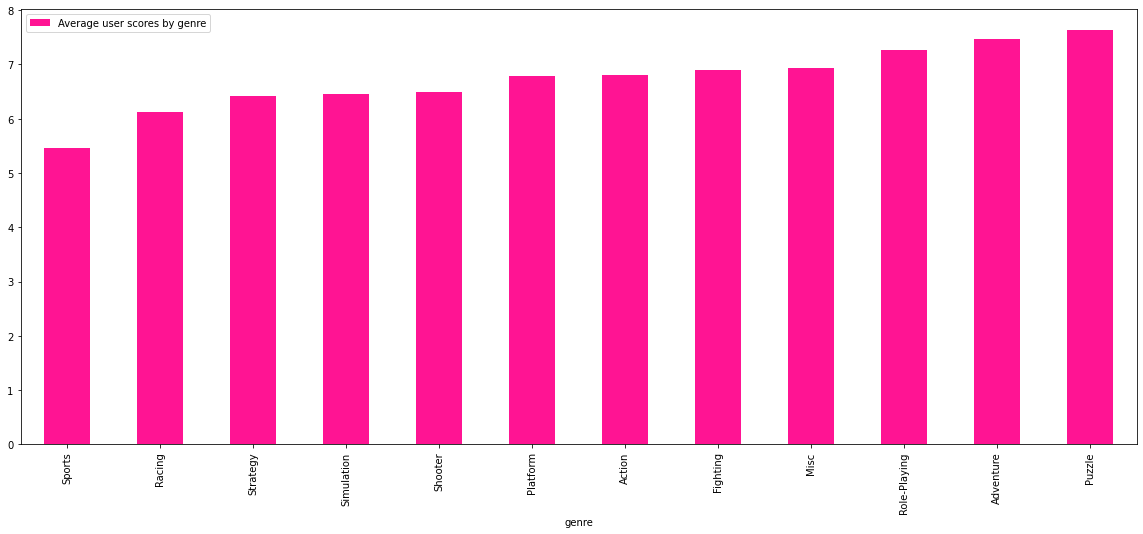

In [87]:
(
    data_clean.groupby("genre")["user_score"]
    .mean()
    .sort_values()
    .plot(
        kind="bar",
        color="deeppink",
        label="Average user scores by genre",
        legend=True,
        figsize=(20, 8),
    )
);

The user ratings for action and sports genres are different, with action genre receiving higher ratings compared to sports games.

## Key Insights and Conclusions from the Analysis


1. The relevant time period for shaping the sales strategy for 2017 is from 2012 onwards.

2. Potentially profitable platforms include Sony PlayStation 4 and Microsoft Xbox One. Additionally, attention should be paid to the PC platform, as it continues to generate sales and has no foreseeable end to its life cycle.

3. User ratings have little to no influence on sales for the most popular platform, as well as for other platforms like X360 and PSP. However, critic ratings may have a small but positive impact.

4. The most profitable game genres are shooters, sports, and platformers. In terms of sales per game, shooters are the most lucrative, while puzzle games had the fewest releases and were among the least successful in terms of median sales. Adventure games also showed lower median sales figures.

5. When crafting a sales strategy, regional specificities should be considered. For North America and Europe, a focus on Microsoft and Sony consoles is recommended. The most popular genre in these regions is shooters, primarily targeting adult audiences. In Japan, emphasis should be placed on locally manufactured consoles, with role-playing and action games being the preferred genres. Age ratings are less prevalent in Japan, with a majority of games released without them. However, within the subset of games with age ratings, those suitable for all ages and teenagers tend to be the most popular.

6. The hypothesis that the average user ratings for Xbox One and PC platforms are the same could not be rejected, suggesting that user ratings for Xbox One and PC platforms are indeed similar.

7. We reject the hypothesis that the average user ratings for action and sports genres are the same. Ratings for action games tend to be higher than those for sports games.